In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files
files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


{'ToyotaCorolla.csv': b'Id,Model,,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Price\r\n1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,13500\r\n2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,13750\r\n3,\xa0TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,13950\r\n4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,

In [4]:
cars = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
cars

,Id,Model,Unnamed: 2,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Price
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,NaN,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,13500
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,NaN,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,13750
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,NaN,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,13950
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,NaN,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,14950
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,NaN,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,13750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,NaN,69,12,1998,20544,Petrol,86,1,...,1,1,0,1,1,1,0,0,0,7500
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,NaN,72,9,1998,19000,Petrol,86,0,...,0,1,0,0,1,1,0,0,0,10845
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,NaN,71,10,1998,17016,Petrol,86,0,...,0,1,0,0,0,1,0,0,0,8500
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,NaN,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,1,0,0,0,7250


In [5]:
df = cars[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight","Price"]]
df

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


In [6]:
df.dtypes

Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
Price            int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age_08_04      1436 non-null   int64
 1   KM             1436 non-null   int64
 2   HP             1436 non-null   int64
 3   cc             1436 non-null   int64
 4   Doors          1436 non-null   int64
 5   Gears          1436 non-null   int64
 6   Quarterly_Tax  1436 non-null   int64
 7   Weight         1436 non-null   int64
 8   Price          1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
df1 = df.rename({'Age_08_04':'Age'},axis=1)
df1.head()

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [9]:
df1.isna().sum()

Age              0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
Price            0
dtype: int64

In [10]:
df1.describe()

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,32500.000000


In [11]:
df1.duplicated().sum()


1

In [12]:
#dropping duplicate values
neww = df1.drop_duplicates(keep='first')
neww

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


In [13]:
neww.corr()

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
Age,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484,-0.876273
KM,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969,-0.569420
HP,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143,0.314134
cc,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077,0.124375
Doors,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734,0.183604
Gears,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238,0.063831
Quarterly_Tax,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988,0.211508
Weight,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000,0.575869
Price,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869,1.000000


<Axes: >

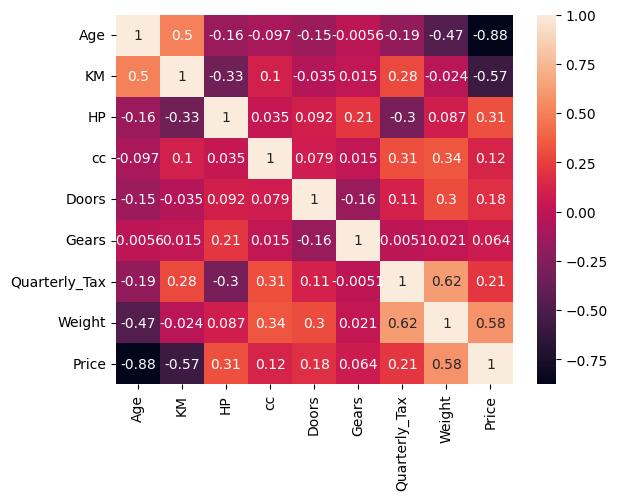

In [14]:
sns.heatmap(neww.corr(), annot = True)

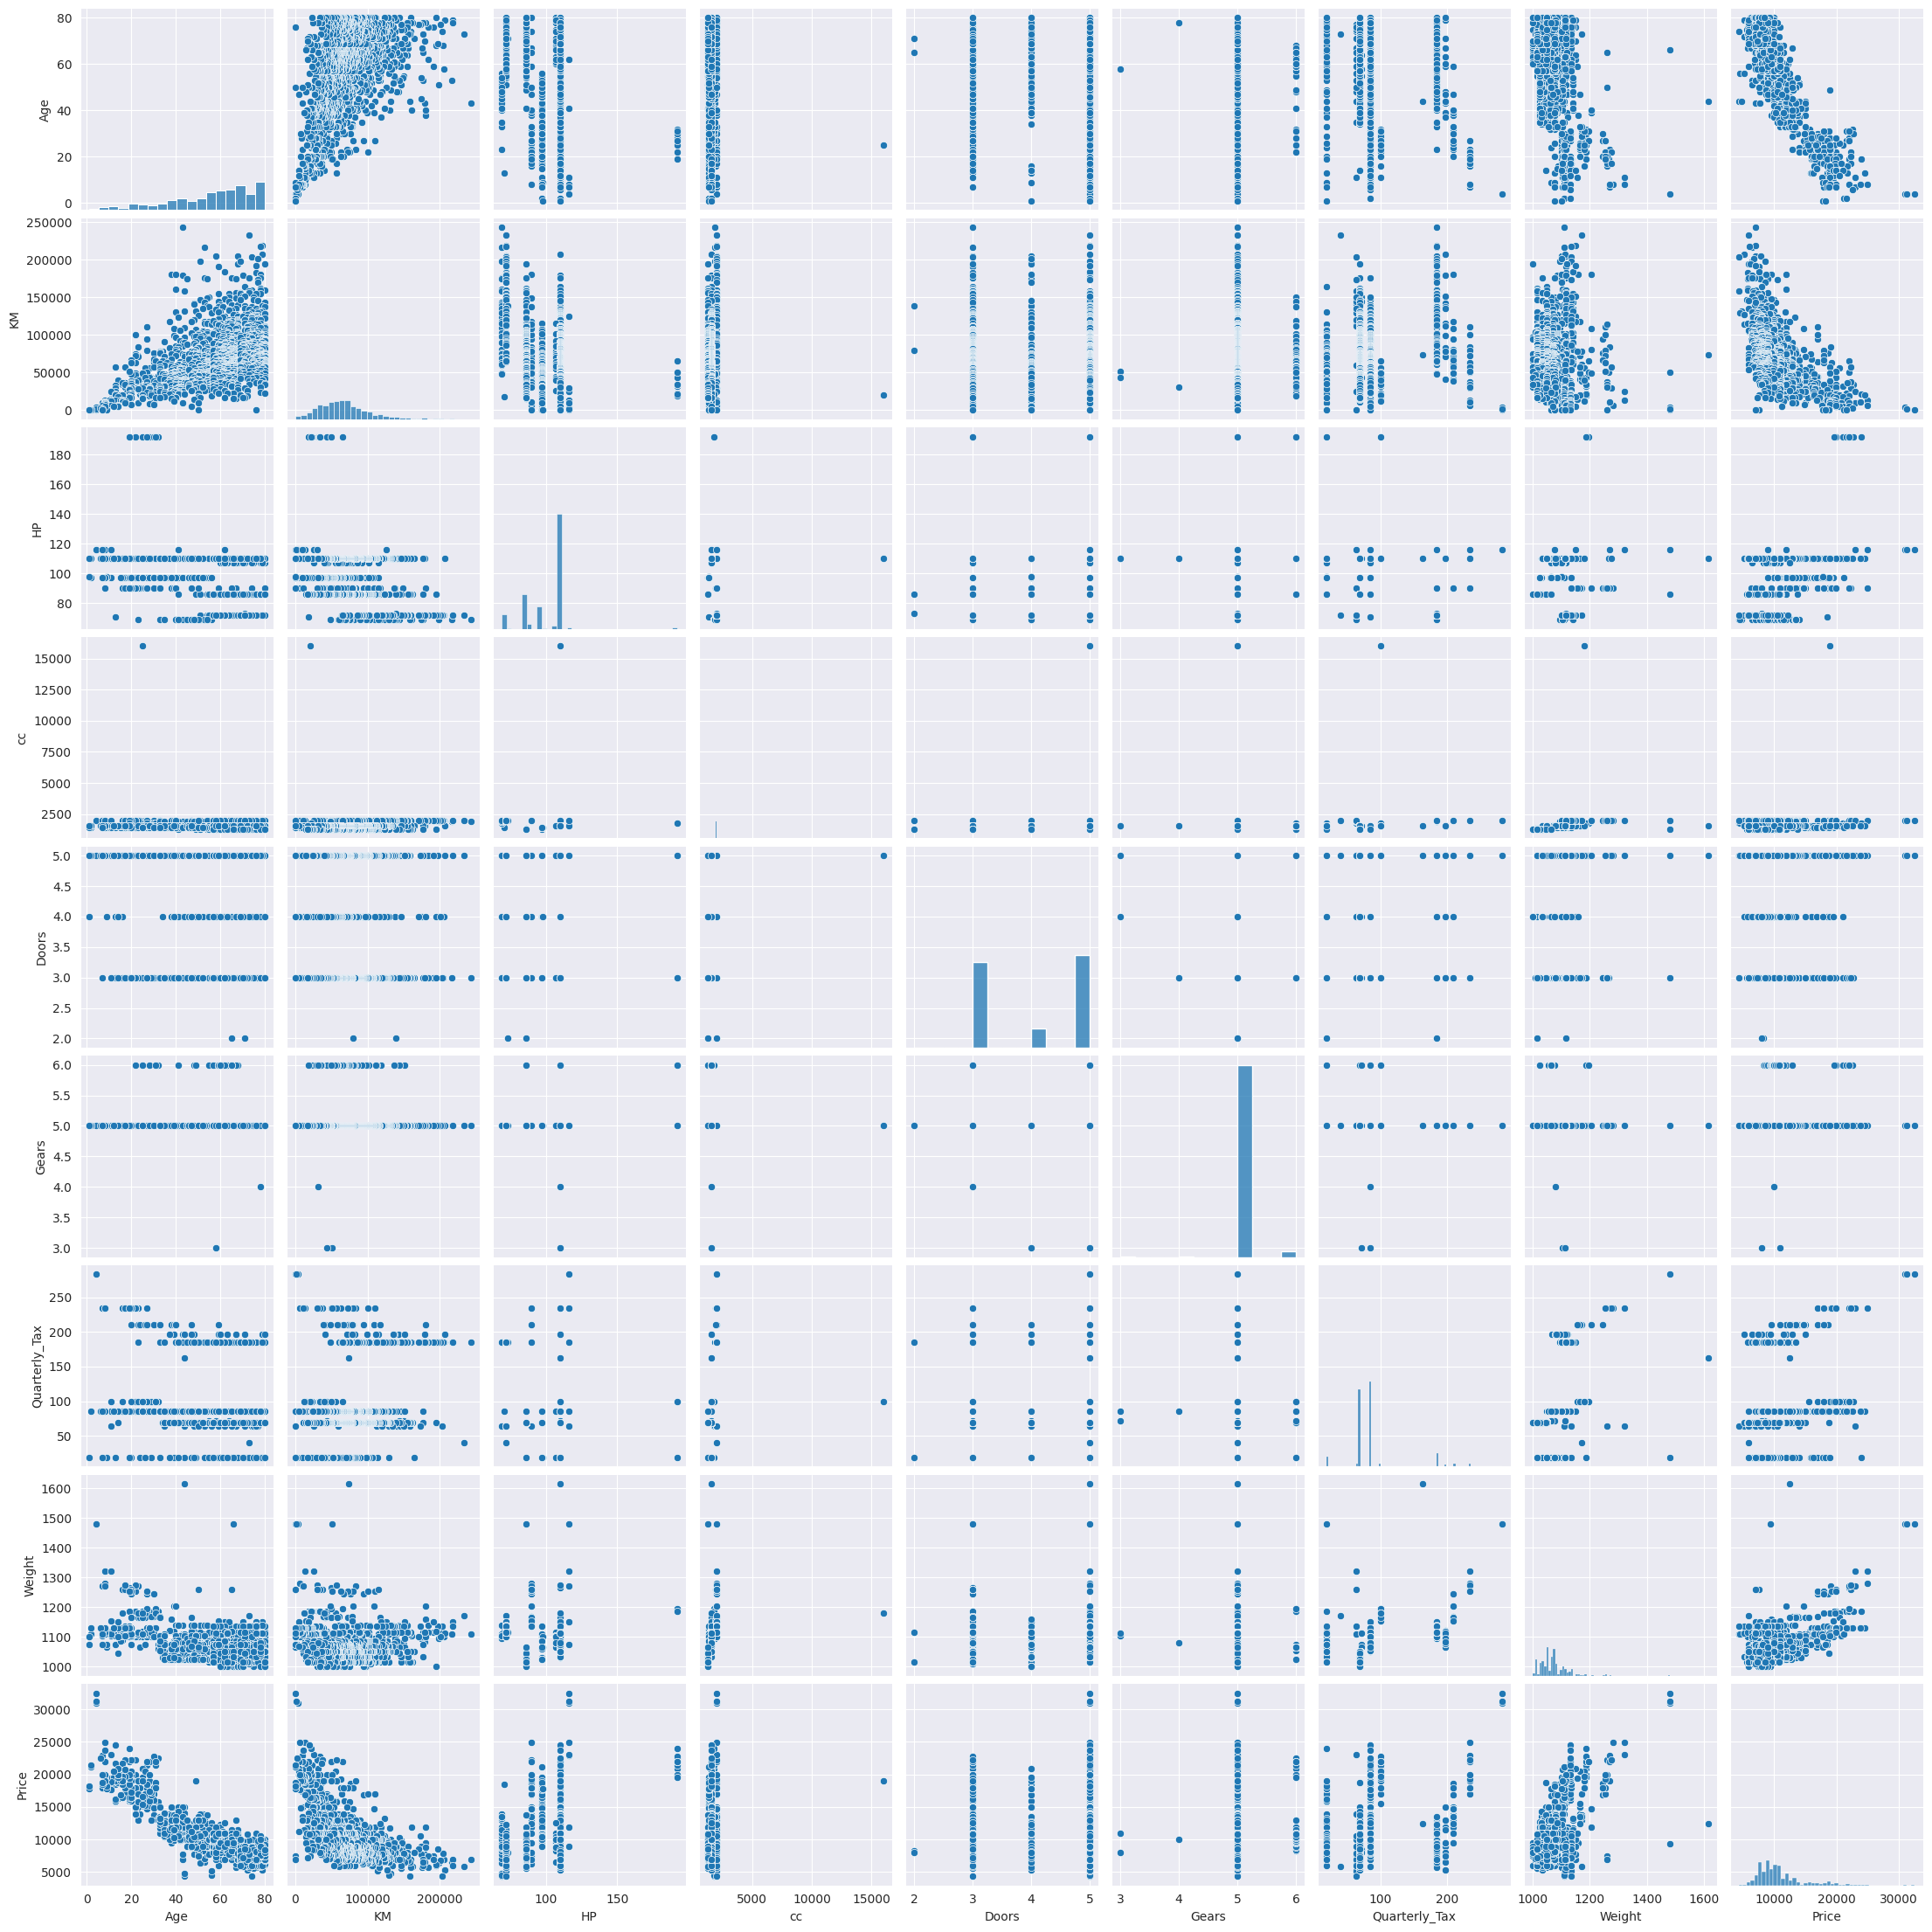

In [15]:
#scatter plots for all the variables
sns.set_style(style='darkgrid')
plt.rcParams['figure.figsize']=50,50
sns.pairplot(neww)

In [16]:
#Building MLR model
#import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=neww).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:53:59   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age            -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**#checking model accuracy**

In [17]:
 model_age = smf.ols('Price~Age',data=neww).fit()
model_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4740.
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:53:59   Log-Likelihood:                -12742.
No. Observations:                1435   AIC:                         2.549e+04
Df Residuals:                    1433   BIC:                         2.550e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.026e+04    145.926    138.818      0.000       2e+04    2.05e+04
Age         -170.3487      2.474    -68.847      0.000    -175.202    -165.495
==============================================================================
Omnibus:                      363.006   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2878.814
Skew:                           0.951   Prob(JB):                         0.00
Kurtosis:                       9.673   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model_km= smf.ols('Price~KM',data=neww).fit()
model_km.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     687.6
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          4.12e-124
Time:                        03:53:59   Log-Likelihood:                -13509.
No. Observations:                1435   AIC:                         2.702e+04
Df Residuals:                    1433   BIC:                         2.703e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.448e+04    163.344     88.643      0.000    1.42e+04    1.48e+04
KM            -0.0548      0.002    -26.222      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.246   Durbin-Watson:                   0.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1119.937
Skew:                           1.385   Prob(JB):                    6.44e-244
Kurtosis:                       6.325   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model_hp= smf.ols('Price~HP',data=neww).fit()
model_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     156.9
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           3.12e-34
Time:                        03:53:59   Log-Likelihood:                -13715.
No. Observations:                1435   AIC:                         2.743e+04
Df Residuals:                    1433   BIC:                         2.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3041.1318    619.766      4.907      0.000    1825.386    4256.877
HP            75.6689      6.041     12.526      0.000      63.818      87.519
==============================================================================
Omnibus:                      447.247   Durbin-Watson:                   0.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1322.705
Skew:                           1.586   Prob(JB):                    6.00e-288
Kurtosis:                       6.473   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model_cc= smf.ols('Price~cc',data=neww).fit()
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           2.29e-06
Time:                        03:53:59   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model_doors= smf.ols('Price~Doors',data=neww).fit()
model_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           2.40e-12
Time:                        03:53:59   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model_market= smf.ols('Price~Gears',data=neww).fit()
model_market.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.863
Date:                Thu, 27 Apr 2023   Prob (F-statistic):             0.0156
Time:                        03:53:59   Log-Likelihood:                -13787.
No. Observations:                1435   AIC:                         2.758e+04
Df Residuals:                    1433   BIC:                         2.759e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4580.9348   2537.643      1.805      0.071    -396.959    9558.828
Gears       1221.5268    504.500      2.421      0.016     231.889    2211.165
==============================================================================
Omnibus:                      480.949   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1497.580
Skew:                           1.691   Prob(JB):                         0.00
Kurtosis:                       6.690   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model_qrttax = smf.ols('Price~Quarterly_Tax',data=neww).fit()
model_qrttax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     67.11
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           5.63e-16
Time:                        03:53:59   Log-Likelihood:                -13757.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1433   BIC:                         2.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9099.3086    218.769     41.593      0.000    8670.166    9528.451
Quarterly_Tax    18.6348      2.275      8.192      0.000      14.173      23.097
==============================================================================
Omnibus:                      373.719   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              865.401
Skew:                           1.428   Prob(JB):                    1.20e-188
Kurtosis:                       5.512   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model_wt = smf.ols('Price~Weight',data=neww).fit()
model_wt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     711.0
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.55e-127
Time:                        03:53:59   Log-Likelihood:                -13501.
No. Observations:                1435   AIC:                         2.701e+04
Df Residuals:                    1433   BIC:                         2.702e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.193e+04   1601.273    -19.938      0.000   -3.51e+04   -2.88e+04
Weight        39.7719      1.492     26.665      0.000      36.846      42.698
==============================================================================
Omnibus:                      104.356   Durbin-Watson:                   0.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.888
Skew:                           0.046   Prob(JB):                    2.57e-112
Kurtosis:                       5.930   Cond. No.                     2.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**#Colinearity Check with independent variables**

In [25]:
colinearity_age = smf.ols('Age~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=neww).fit()
colinearity_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     178.6
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          6.30e-190
Time:                        03:53:59   Log-Likelihood:                -5776.1
No. Observations:                1435   AIC:                         1.157e+04
Df Residuals:                    1427   BIC:                         1.161e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       198.4450     13.298     14.923      0.000     172.360     224.530
KM                0.0003   1.06e-05     24.616      0.000       0.000       0.000
HP                0.0423      0.029      1.485      0.138      -0.014       0.098
cc                0.0004      0.001      0.456      0.648      -0.001       0.002
Doors            -0.0455      0.405     -0.112      0.911      -0.840       0.749
Gears            -1.2715      1.994     -0.638      0.524      -5.183       2.640
Quarterly_Tax    -0.0369      0.013     -2.788      0.005      -0.063      -0.011
Weight           -0.1451      0.010    -14.331      0.000      -0.165      -0.125
==============================================================================
Omnibus:                       11.426   Durbin-Watson:                   0.499
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               16.437
Skew:                           0.029   Prob(JB):                     0.000270
Kurtosis:                       3.521   Cond. No.                     2.91e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
colinearity_km = smf.ols('KM~Age+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=neww).fit()
colinearity_km.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     KM   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     154.4
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.06e-169
Time:                        03:53:59   Log-Likelihood:                -16744.
No. Observations:                1435   AIC:                         3.350e+04
Df Residuals:                    1427   BIC:                         3.355e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.986e+04   2.98e+04     -2.683      0.007   -1.38e+05   -2.15e+04
Age            1139.3572     46.286     24.616      0.000    1048.562    1230.152
HP             -446.7967     58.349     -7.657      0.000    -561.255    -332.338
cc                5.0818      1.898      2.677      0.008       1.358       8.805
Doors           931.4764    844.579      1.103      0.270    -725.274    2588.227
Gears          1.171e+04   4150.339      2.822      0.005    3572.070    1.99e+04
Quarterly_Tax   264.7084     26.792      9.880      0.000     212.152     317.265
Weight           33.8712     22.580      1.500      0.134     -10.422      78.164
==============================================================================
Omnibus:                      174.778   Durbin-Watson:                   0.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.378
Skew:                           0.769   Prob(JB):                     3.00e-72
Kurtosis:                       4.773   Cond. No.                     7.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
colinearity_hp = smf.ols('HP~Age+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=neww).fit()
colinearity_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     85.45
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          6.54e-104
Time:                        03:53:59   Log-Likelihood:                -5668.8
No. Observations:                1435   AIC:                         1.135e+04
Df Residuals:                    1427   BIC:                         1.140e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -80.1317     13.097     -6.118      0.000    -105.823     -54.440
Age               0.0365      0.025      1.485      0.138      -0.012       0.085
KM            -8.834e-05   1.15e-05     -7.657      0.000      -0.000   -6.57e-05
cc                0.0030      0.001      3.522      0.000       0.001       0.005
Doors             1.0082      0.375      2.690      0.007       0.273       1.743
Gears            16.8693      1.796      9.393      0.000      13.346      20.392
Quarterly_Tax    -0.1754      0.011    -15.384      0.000      -0.198      -0.153
Weight            0.1001      0.010     10.332      0.000       0.081       0.119
==============================================================================
Omnibus:                      303.049   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2712.413
Skew:                           0.717   Prob(JB):                         0.00
Kurtosis:                       9.581   Cond. No.                     3.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
colinearity_cc = smf.ols('cc~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=neww).fit()
colinearity_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     cc   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     33.32
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           3.77e-43
Time:                        03:53:59   Log-Likelihood:                -10610.
No. Observations:                1435   AIC:                         2.124e+04
Df Residuals:                    1427   BIC:                         2.128e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -802.1927    414.549     -1.935      0.053   -1615.383      10.998
Age               0.3508      0.768      0.456      0.648      -1.157       1.858
KM                0.0010      0.000      2.677      0.008       0.000       0.002
HP                2.9044      0.825      3.522      0.000       1.287       4.522
Doors            -7.2074     11.753     -0.613      0.540     -30.262      15.847
Gears           -32.9662     57.891     -0.569      0.569    -146.526      80.594
Quarterly_Tax     1.7770      0.382      4.647      0.000       1.027       2.527
Weight            1.8997      0.310      6.122      0.000       1.291       2.508
==============================================================================
Omnibus:                     3957.002   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         85375753.389
Skew:                          33.006   Prob(JB):                         0.00
Kurtosis:                    1196.118   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
colinearity_doors = smf.ols('Doors~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=neww).fit()
colinearity_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Doors   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     31.78
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           3.62e-41
Time:                        03:53:59   Log-Likelihood:                -1862.1
No. Observations:                1435   AIC:                             3740.
Df Residuals:                    1427   BIC:                             3782.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2397      0.934      1.327      0.185      -0.593       3.072
Age              -0.0002      0.002     -0.112      0.911      -0.004       0.003
KM             9.143e-07   8.29e-07      1.103      0.270   -7.12e-07    2.54e-06
HP                0.0050      0.002      2.690      0.007       0.001       0.009
cc            -3.656e-05   5.96e-05     -0.613      0.540      -0.000    8.04e-05
Gears            -0.9361      0.128     -7.312      0.000      -1.187      -0.685
Quarterly_Tax    -0.0024      0.001     -2.825      0.005      -0.004      -0.001
Weight            0.0067      0.001      9.811      0.000       0.005       0.008
==============================================================================
Omnibus:                     1395.918   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.910
Skew:                          -0.252   Prob(JB):                     1.66e-23
Kurtosis:                       1.775   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
colinearity_gears = smf.ols('Gears~Age+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=neww).fit()
colinearity_gears.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Gears   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     20.15
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           6.42e-26
Time:                        03:53:59   Log-Likelihood:                 425.91
No. Observations:                1435   AIC:                            -835.8
Df Residuals:                    1427   BIC:                            -793.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.7450      0.142     33.350      0.000       4.466       5.024
Age              -0.0002      0.000     -0.638      0.524      -0.001       0.000
KM             4.739e-07   1.68e-07      2.822      0.005    1.45e-07    8.03e-07
HP                0.0035      0.000      9.393      0.000       0.003       0.004
cc            -6.892e-06   1.21e-05     -0.569      0.569   -3.06e-05    1.68e-05
Doors            -0.0386      0.005     -7.312      0.000      -0.049      -0.028
Quarterly_Tax     0.0003      0.000      1.678      0.094   -4.99e-05       0.001
Weight         4.845e-05      0.000      0.337      0.736      -0.000       0.000
==============================================================================
Omnibus:                      711.552   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85887.321
Skew:                           1.302   Prob(JB):                         0.00
Kurtosis:                      40.811   Cond. No.                     2.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
colinearity_qrttax = smf.ols('Quarterly_Tax~Age+KM+HP+cc+Doors+Gears+Weight',data=neww).fit()
colinearity_qrttax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Quarterly_Tax   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     264.1
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          3.35e-252
Time:                        03:54:00   Log-Likelihood:                -6767.1
No. Observations:                1435   AIC:                         1.355e+04
Df Residuals:                    1427   BIC:                         1.359e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -387.9271     26.610    -14.578      0.000    -440.126    -335.729
Age           -0.1468      0.053     -2.788      0.005      -0.250      -0.043
KM             0.0002   2.45e-05      9.880      0.000       0.000       0.000
HP            -0.8108      0.053    -15.384      0.000      -0.914      -0.707
cc             0.0084      0.002      4.647      0.000       0.005       0.012
Doors         -2.2753      0.805     -2.825      0.005      -3.855      -0.695
Gears          6.6691      3.974      1.678      0.094      -1.127      14.465
Weight         0.4768      0.018     27.203      0.000       0.442       0.511
==============================================================================
Omnibus:                      638.557   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10049.292
Skew:                          -1.654   Prob(JB):                         0.00
Kurtosis:                      15.535   Cond. No.                     2.92e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
colinearity_weight = smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=neww).fit()
colinearity_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     303.2
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          5.25e-277
Time:                        03:54:00   Log-Likelihood:                -7058.9
No. Observations:                1435   AIC:                         1.413e+04
Df Residuals:                    1427   BIC:                         1.418e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       917.3810     25.141     36.489      0.000     868.063     966.699
Age              -0.8671      0.061    -14.331      0.000      -0.986      -0.748
KM             4.648e-05    3.1e-05      1.500      0.134   -1.43e-05       0.000
HP                0.6950      0.067     10.332      0.000       0.563       0.827
cc                0.0135      0.002      6.122      0.000       0.009       0.018
Doors             9.3988      0.958      9.811      0.000       7.520      11.278
Gears             1.6435      4.875      0.337      0.736      -7.920      11.207
Quarterly_Tax     0.7161      0.026     27.203      0.000       0.665       0.768
==============================================================================
Omnibus:                     1651.063   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264459.185
Skew:                           5.571   Prob(JB):                         0.00
Kurtosis:                      68.566   Cond. No.                     2.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**VIF**

In [40]:
rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=neww).fit().rsquared
vif_age=1/(1-rsq_age)



In [41]:
rsq_km=smf.ols('KM~Age+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=neww).fit().rsquared
vif_km=1/(1-rsq_km)

In [42]:
rsq_hp=smf.ols('HP~Age+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=neww).fit().rsquared
vif_hp=1/(1-rsq_hp)

In [43]:
rsq_cc=smf.ols('cc~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=neww).fit().rsquared
vif_cc=1/(1-rsq_cc)

In [44]:
rsq_doors=smf.ols('Doors~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=neww).fit().rsquared
vif_doors=1/(1-rsq_doors)

In [45]:
rsq_gear=smf.ols('Gears~Age+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=neww).fit().rsquared
vif_gear=1/(1-rsq_gear)

In [46]:
rsq_qrttx=smf.ols('Quarterly_Tax~Age+KM+HP+cc+Doors+Gears+Weight',data=neww).fit().rsquared
vif_qrttx=1/(1-rsq_qrttx)

In [47]:
rsq_weight=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=neww).fit().rsquared
vif_weight=1/(1-rsq_weight)

In [49]:

d1= {'Variables':['Age','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gear,vif_qrttx,vif_weight]}
vif_values=pd.DataFrame(d1)
vif_values

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


**Residual Values**

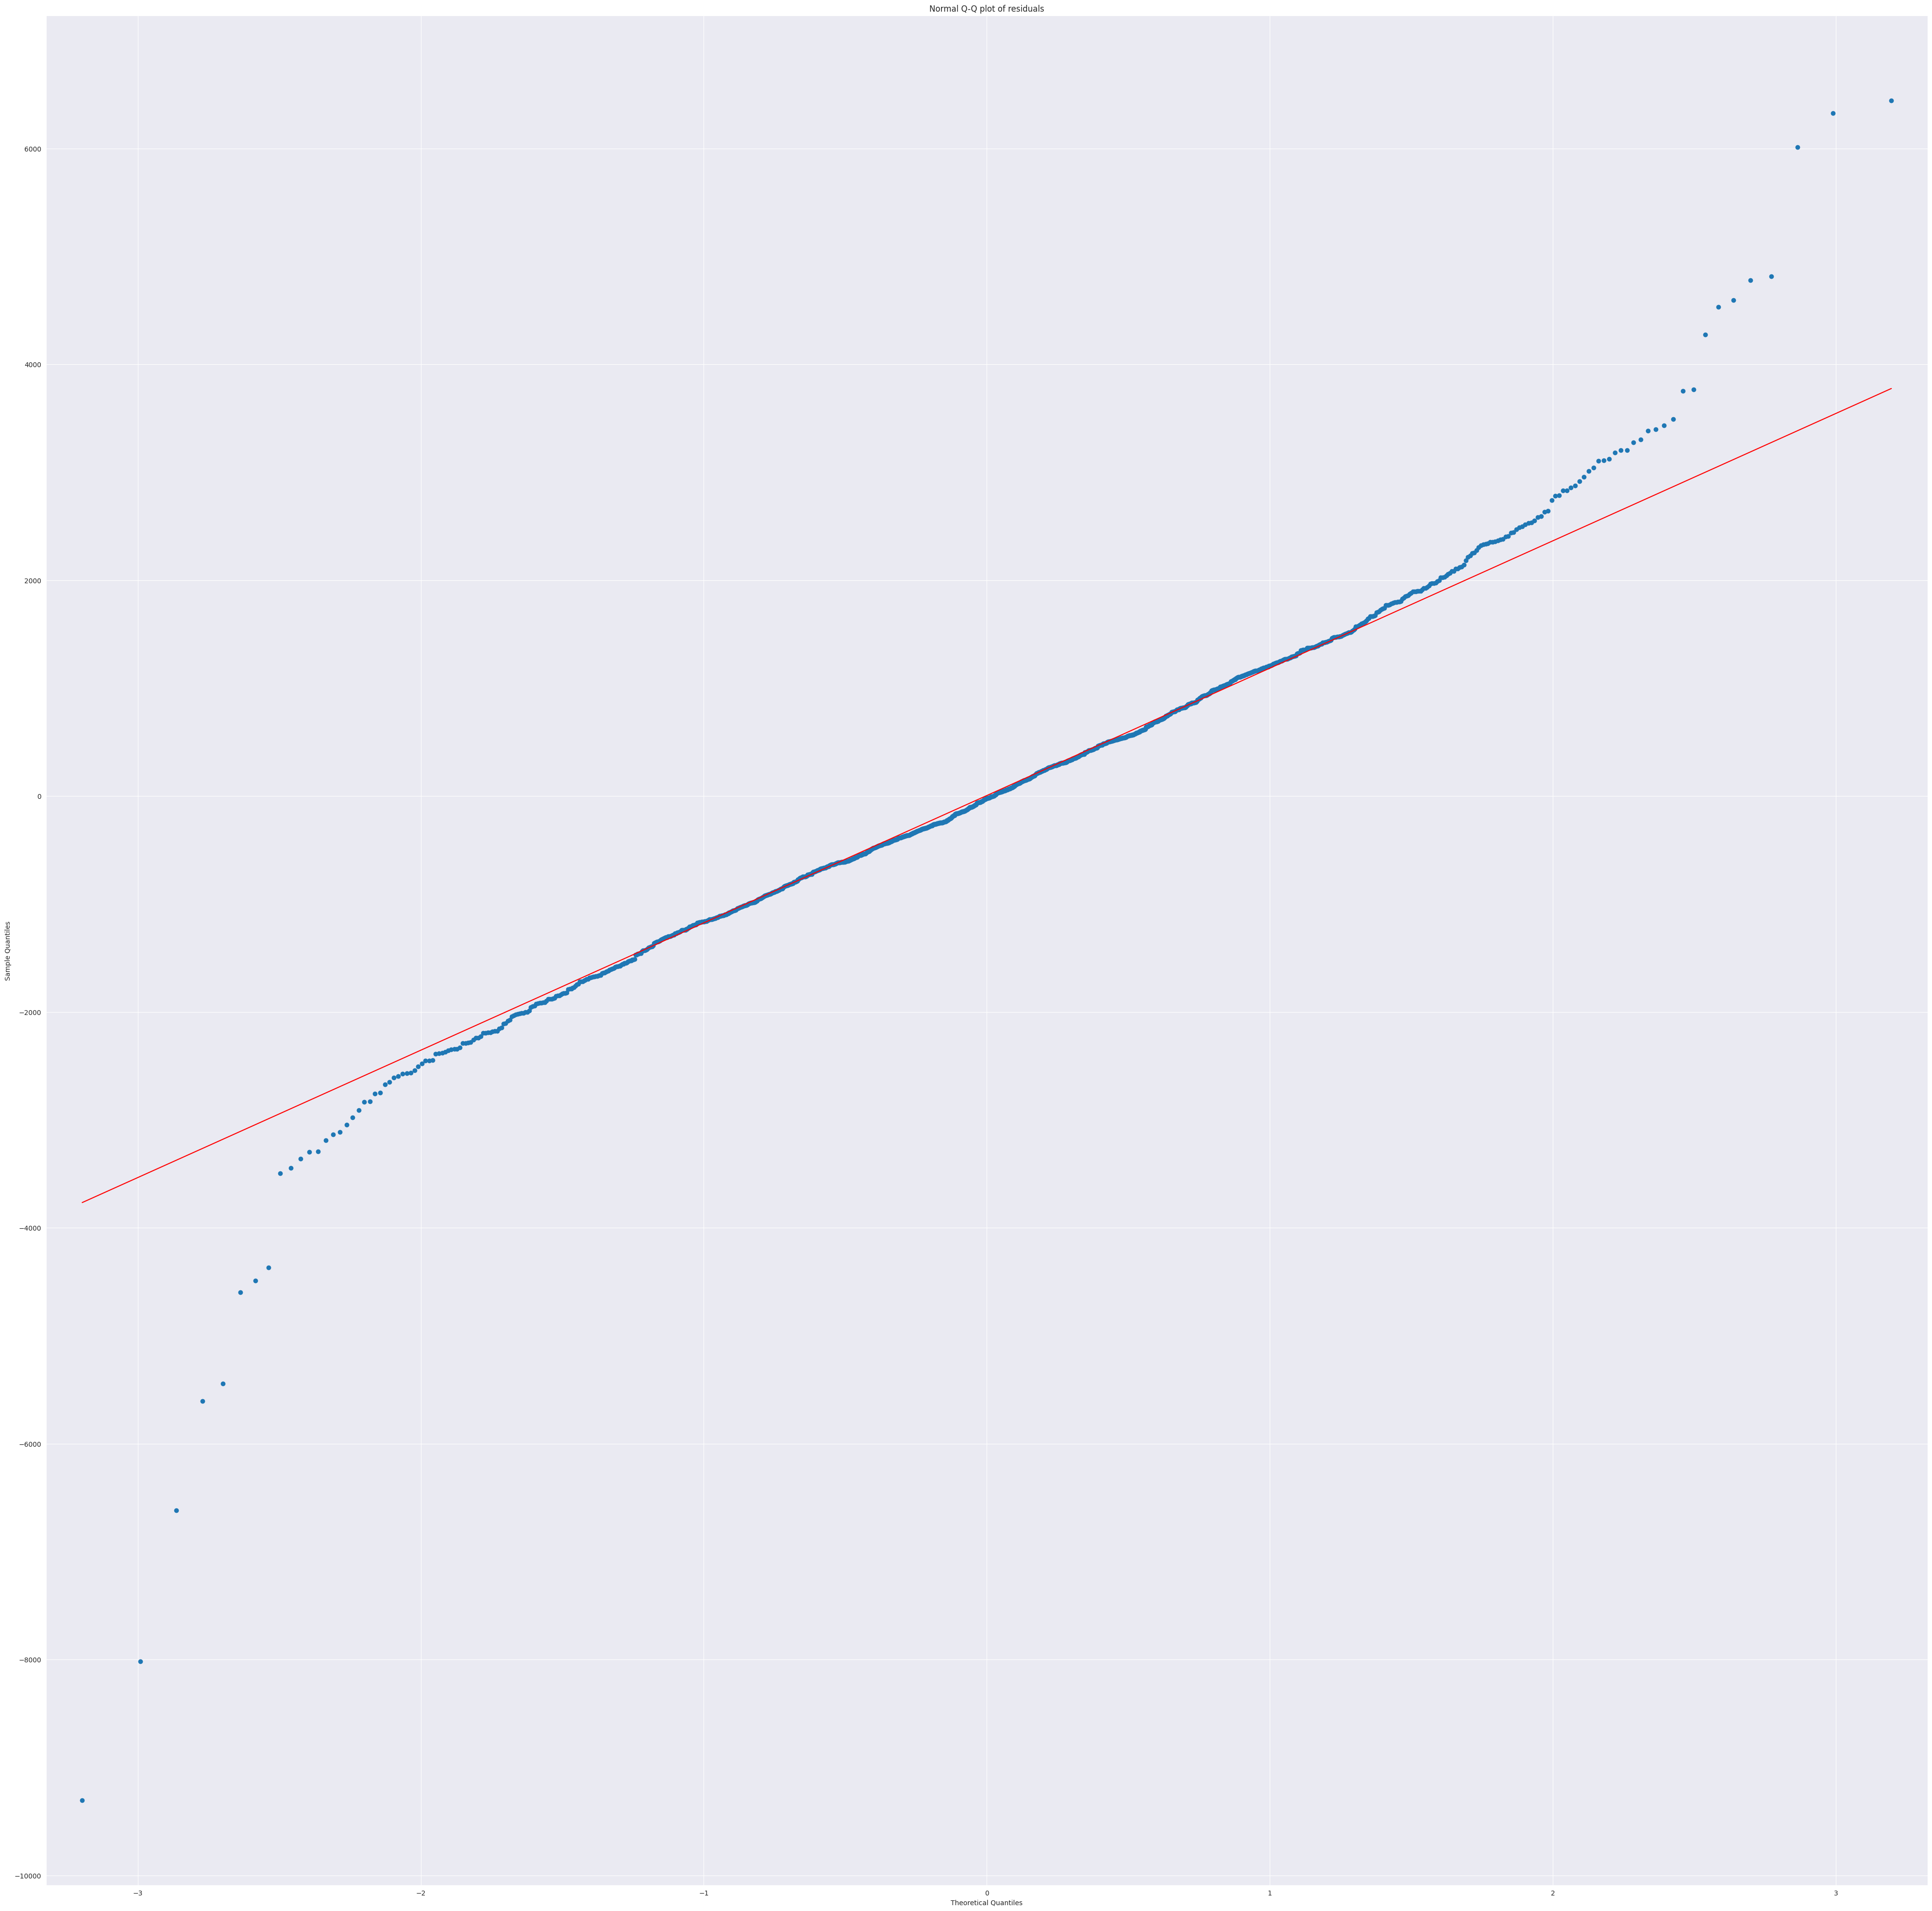

In [50]:
import statsmodels.api as sm
qqplot= sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [51]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

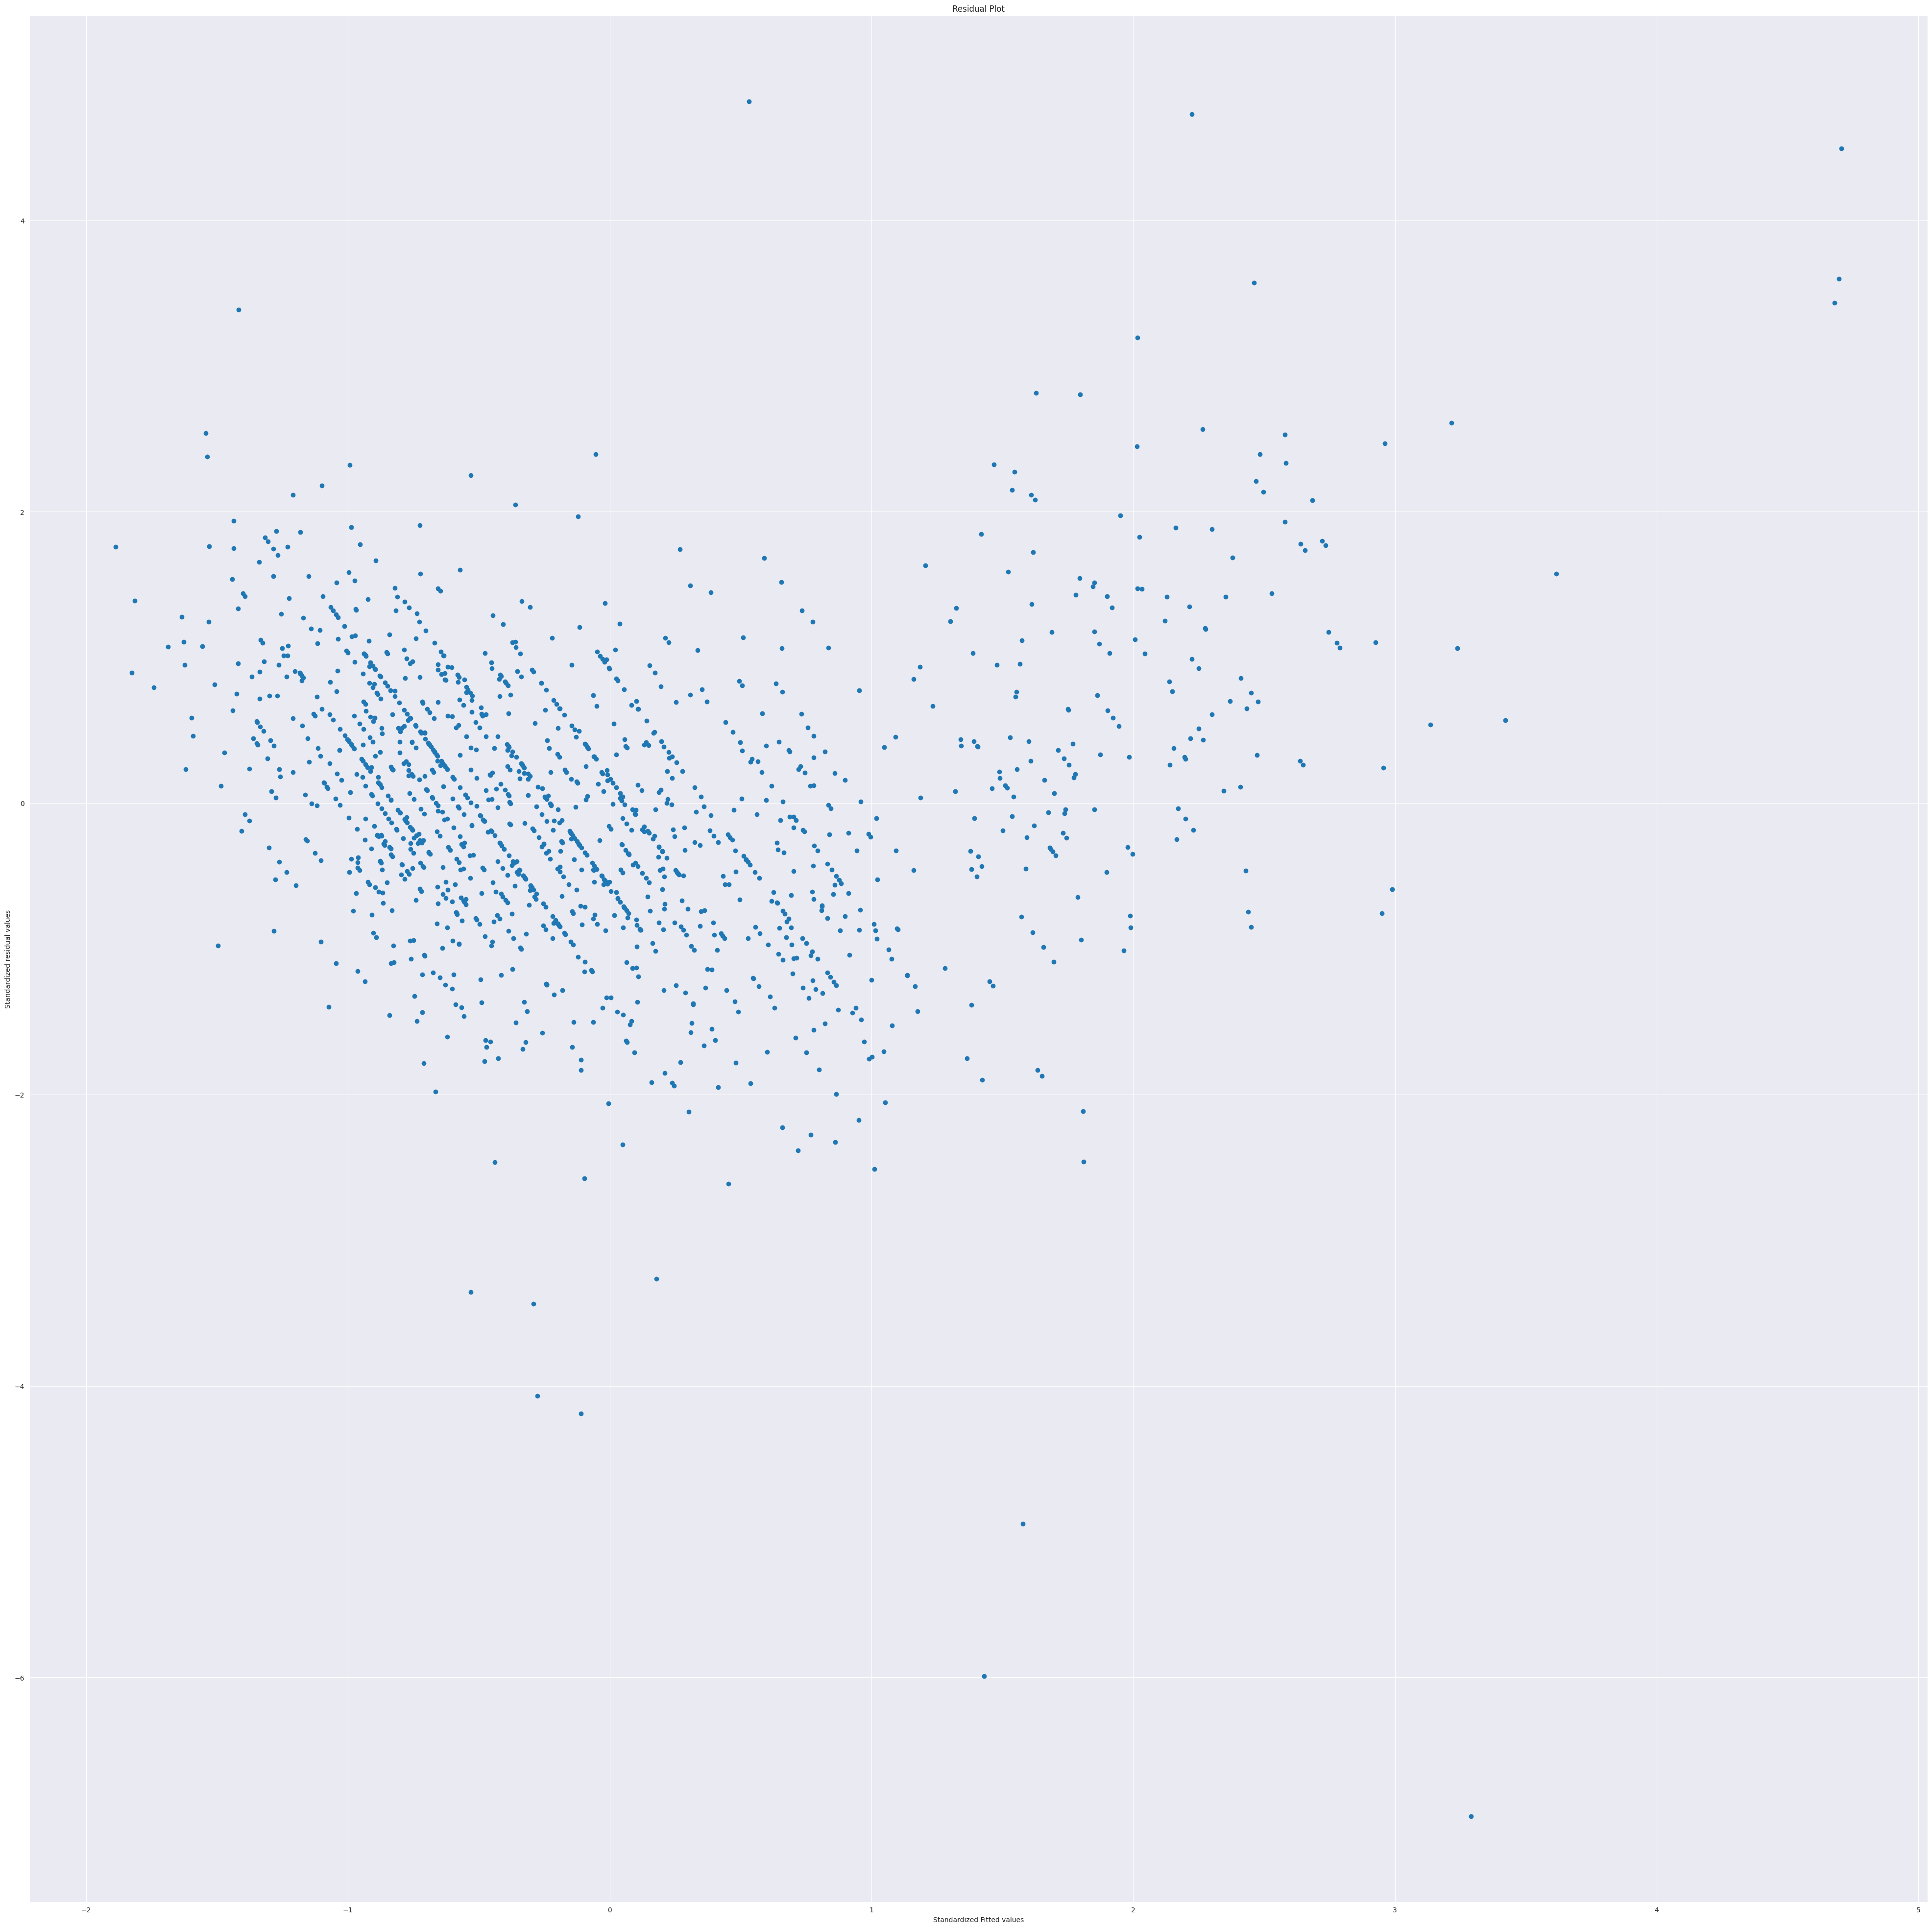

In [52]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

**Regressor plots**

eval_env: 1


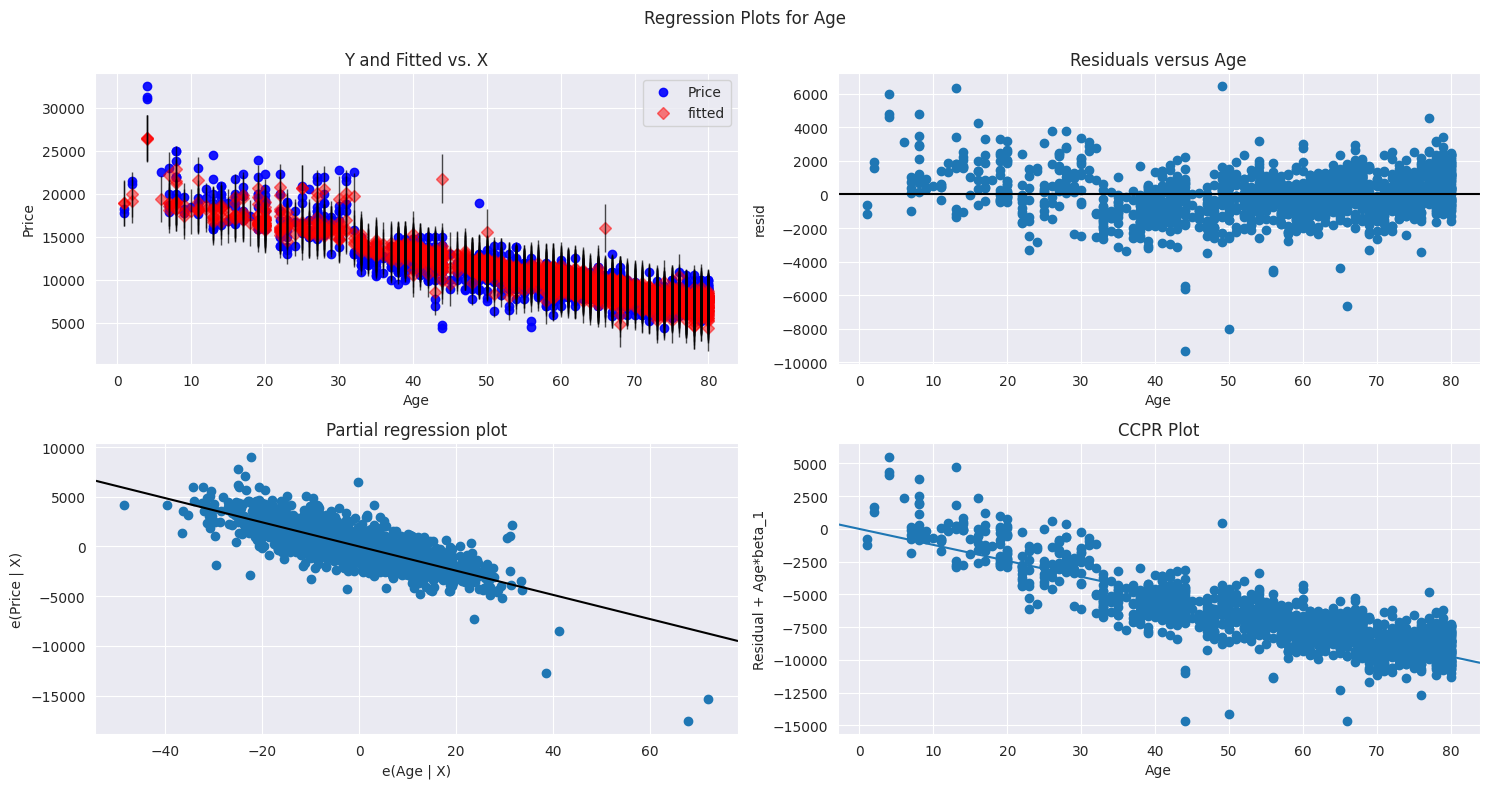

In [53]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


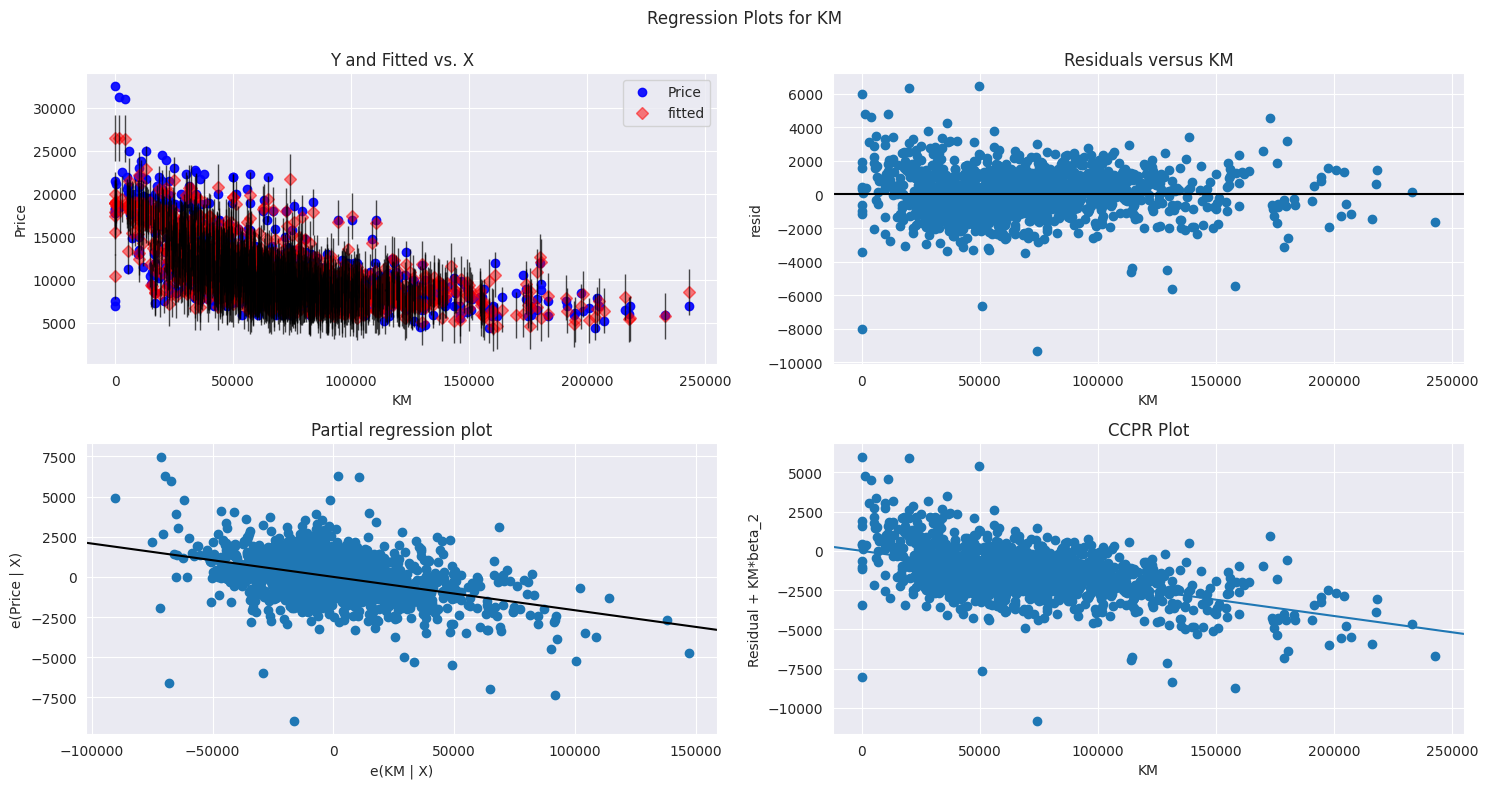

In [54]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


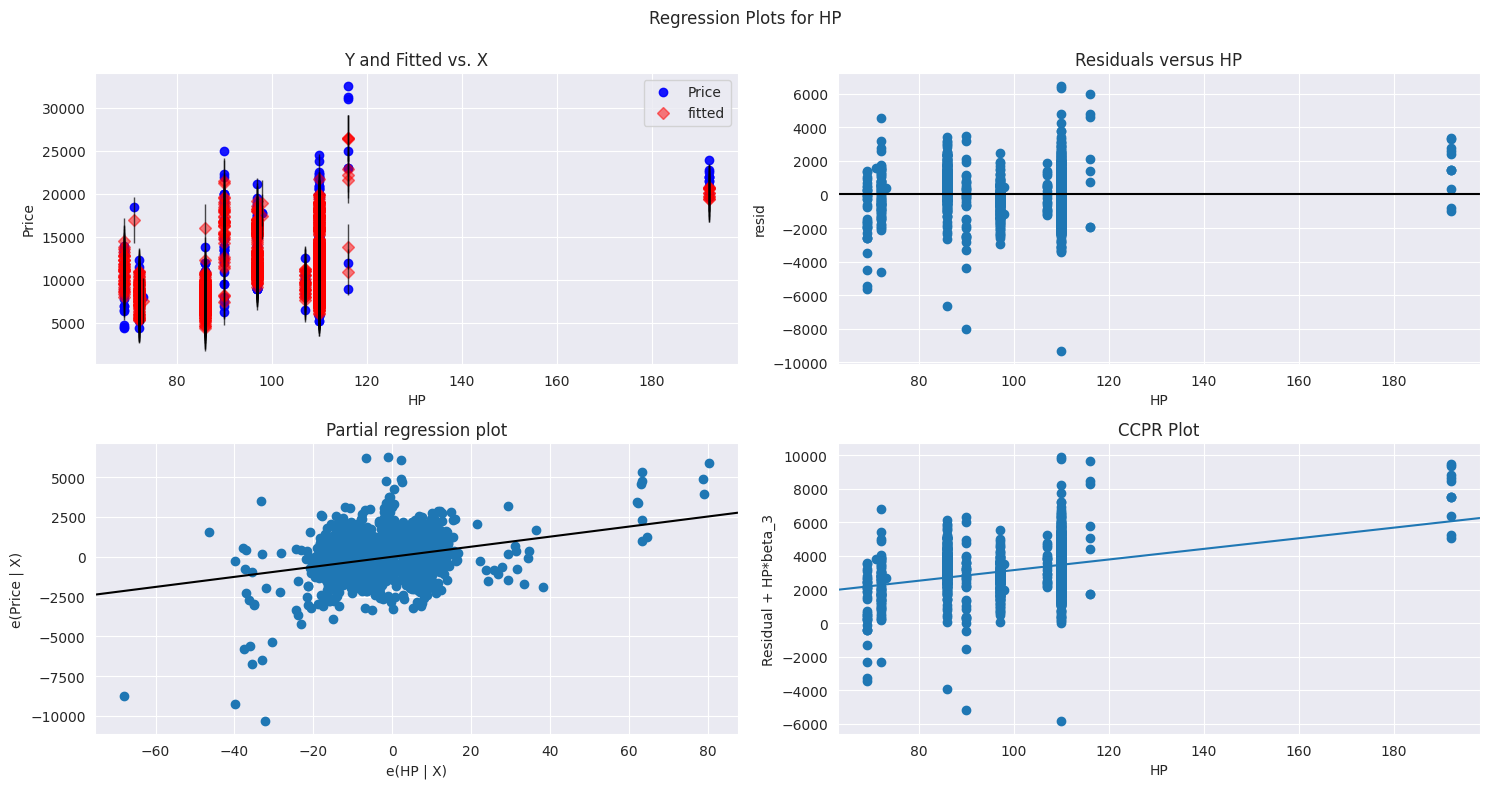

In [59]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


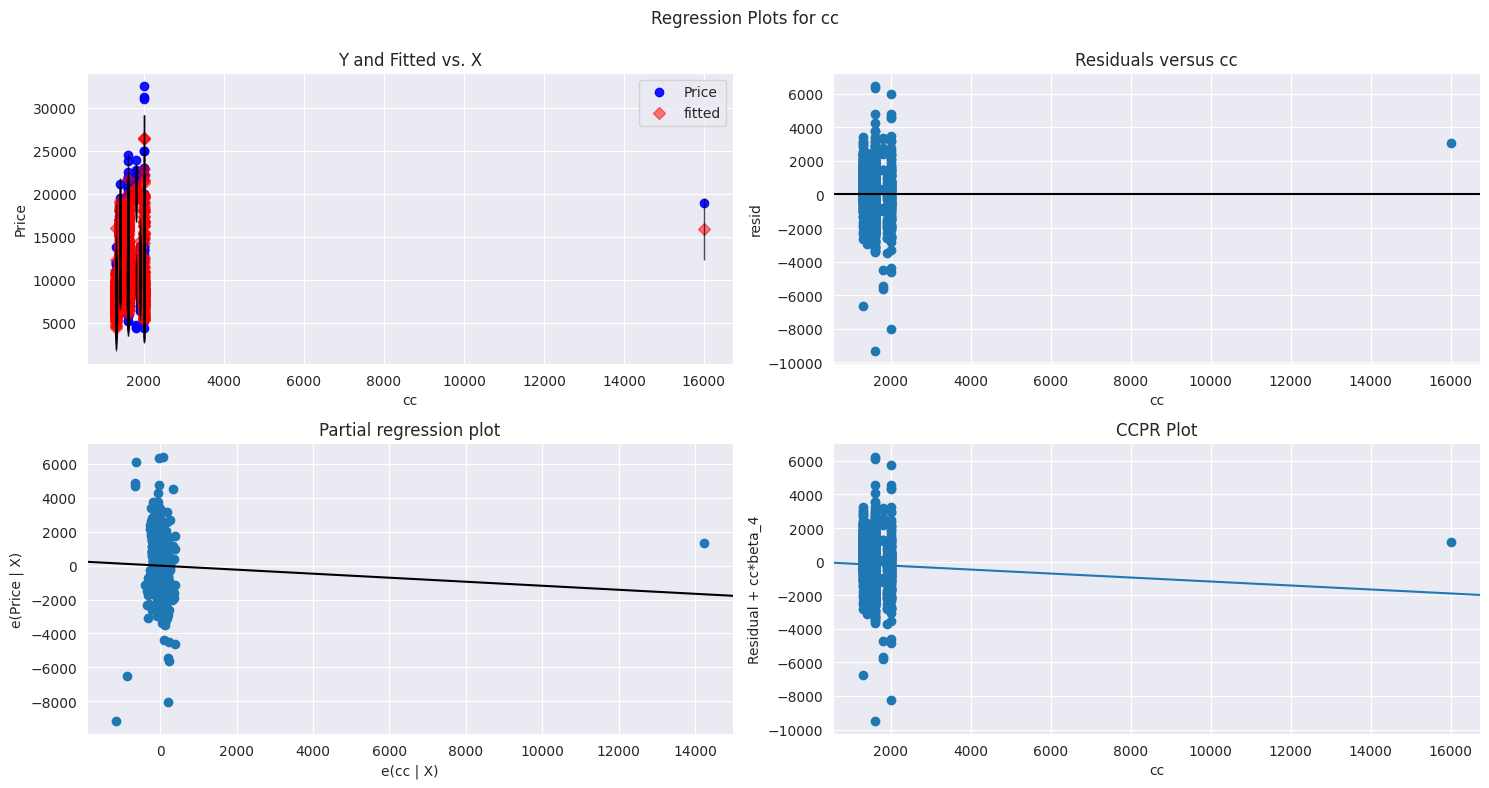

In [55]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

eval_env: 1


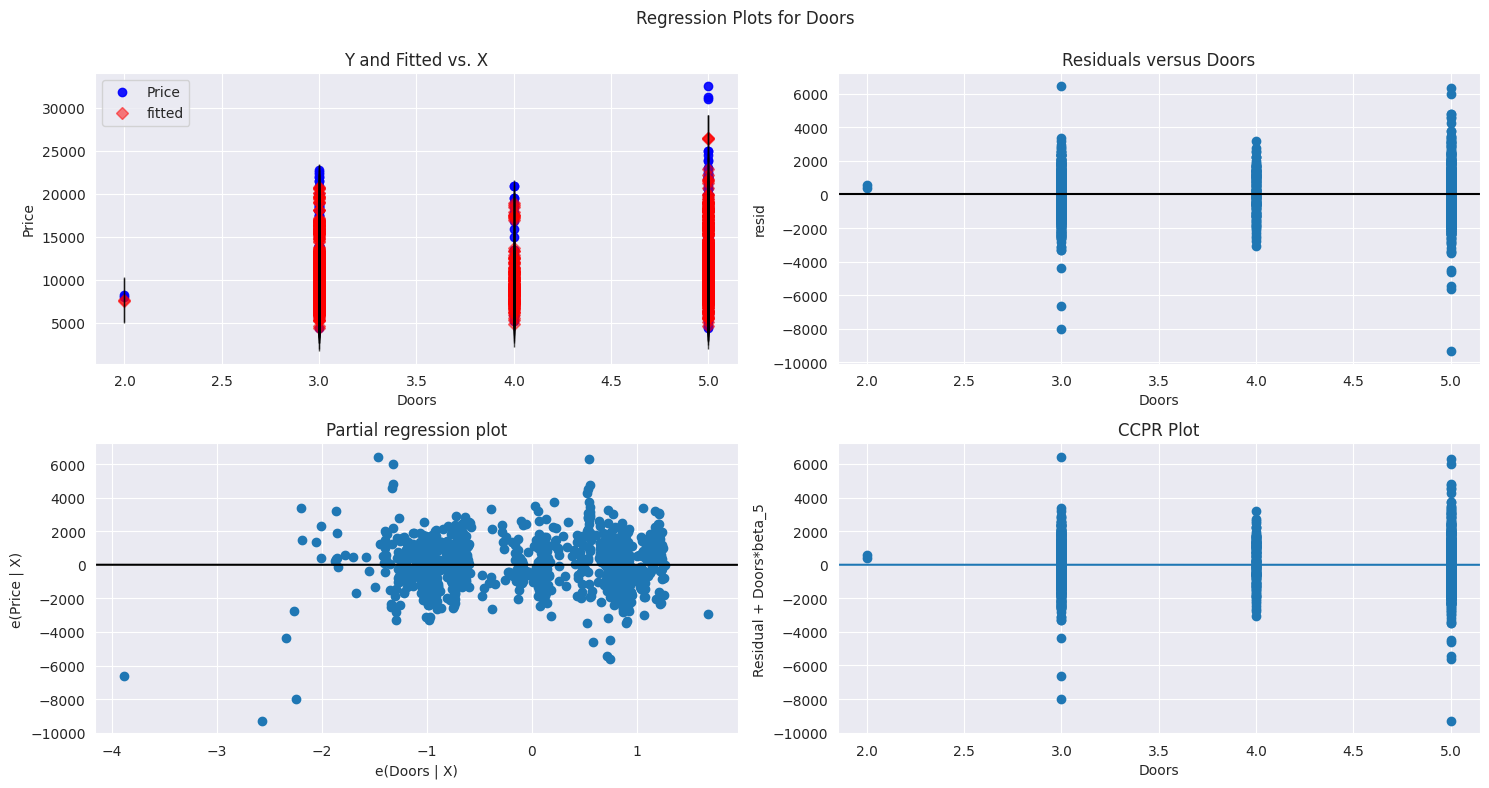

In [56]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


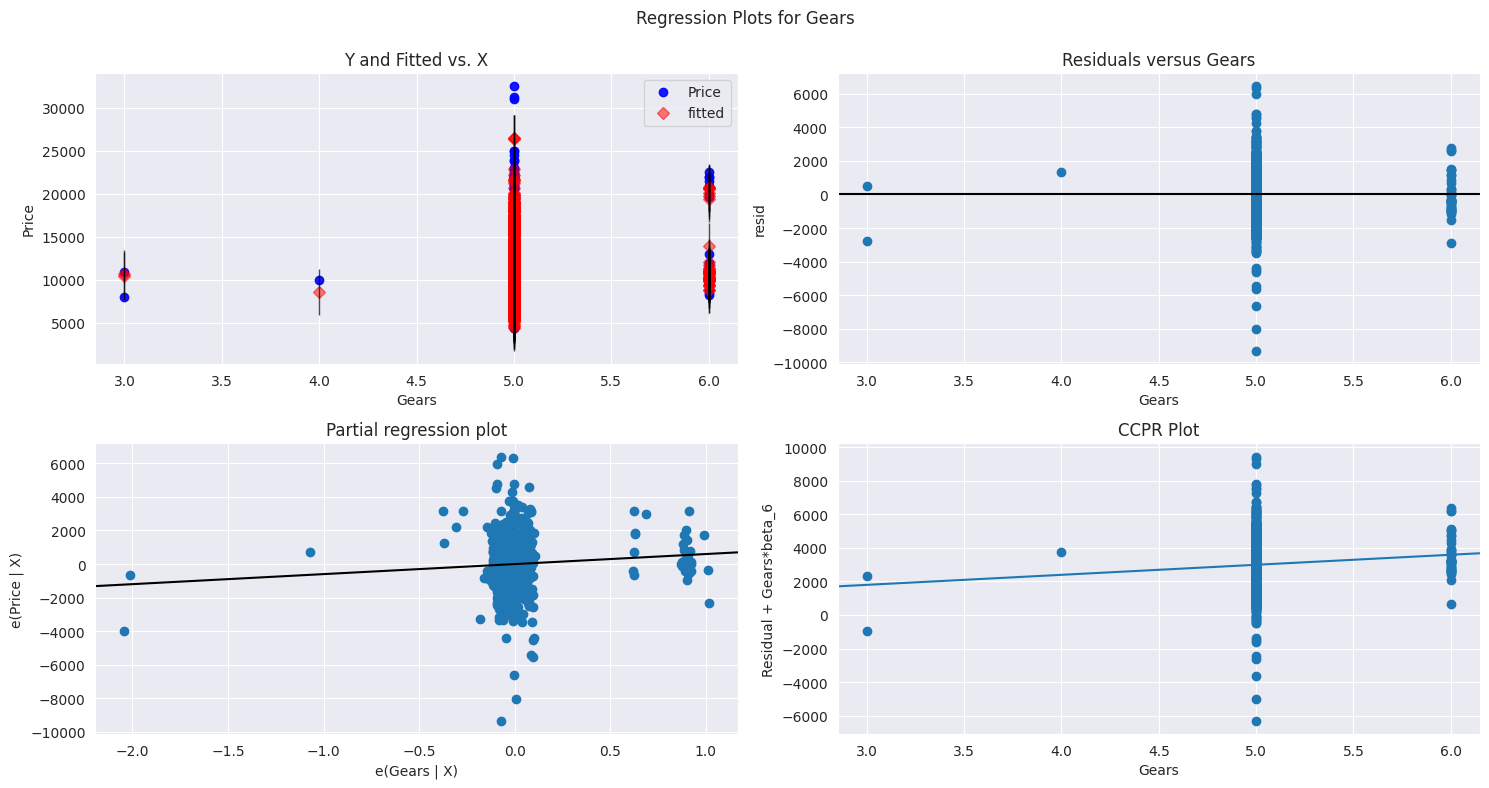

In [57]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


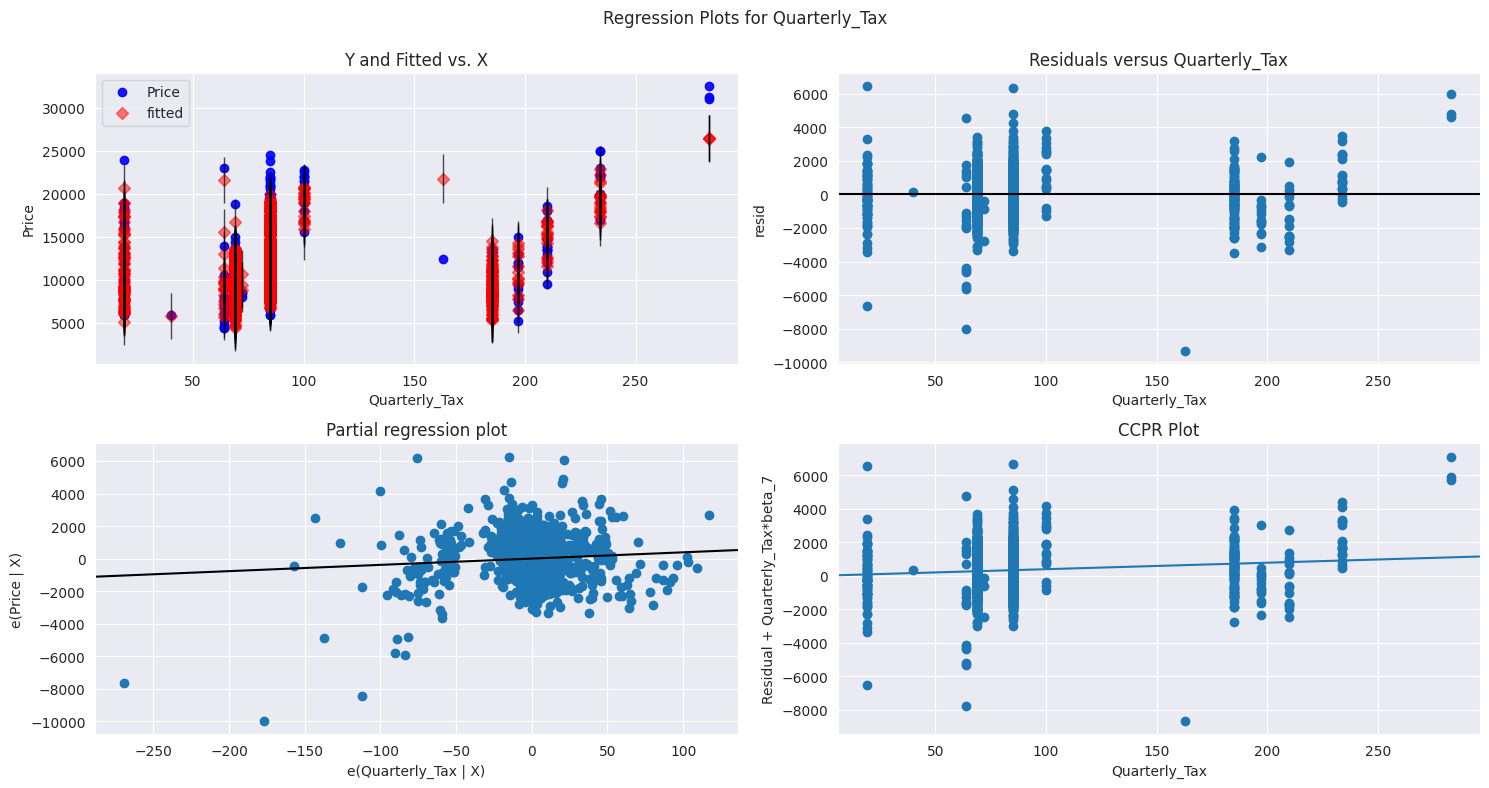

In [61]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

eval_env: 1


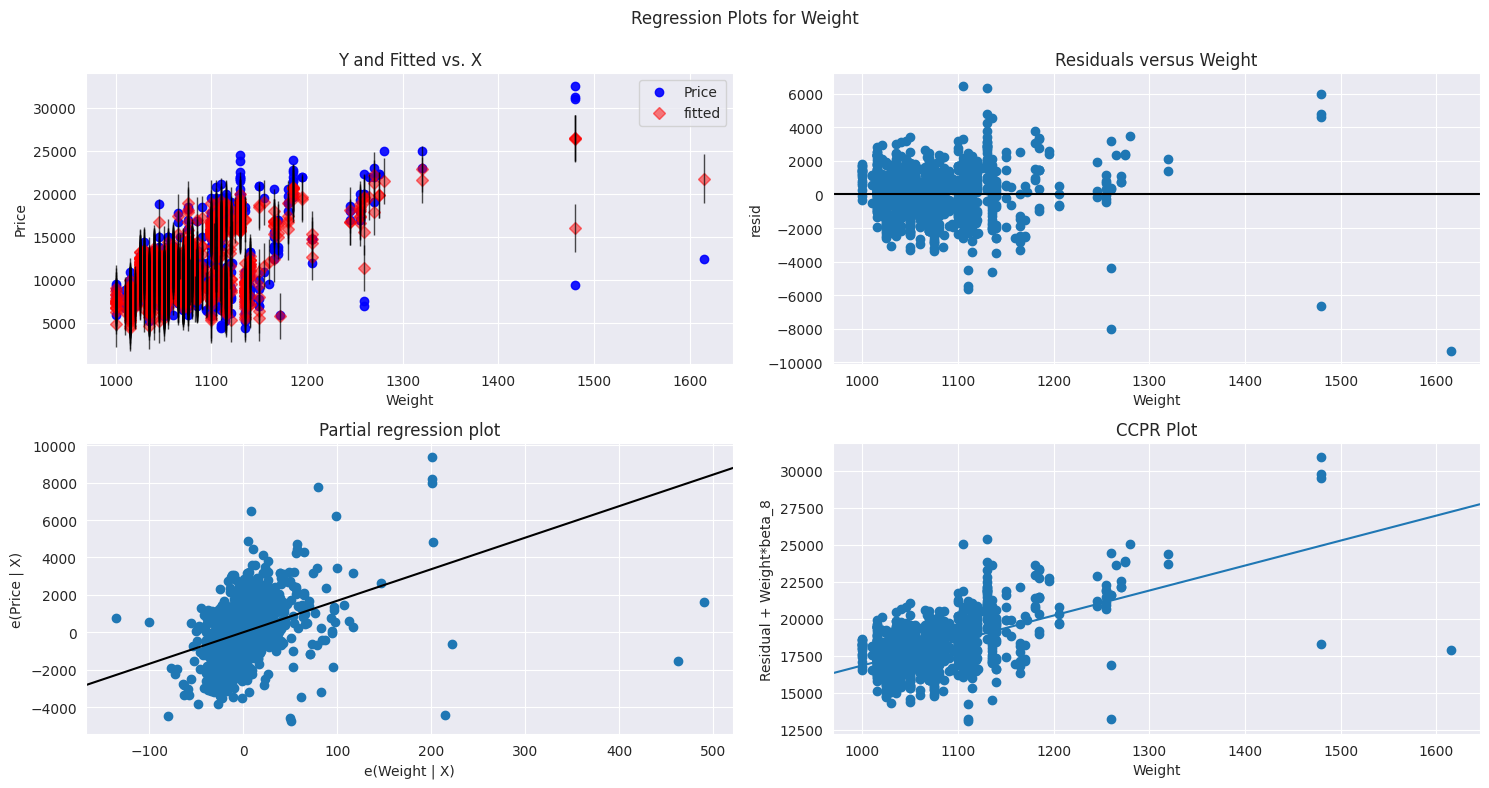

In [62]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [72]:
model_outliers = model.get_influence()
(c, _) = model_outliers.cooks_distance

In [73]:
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

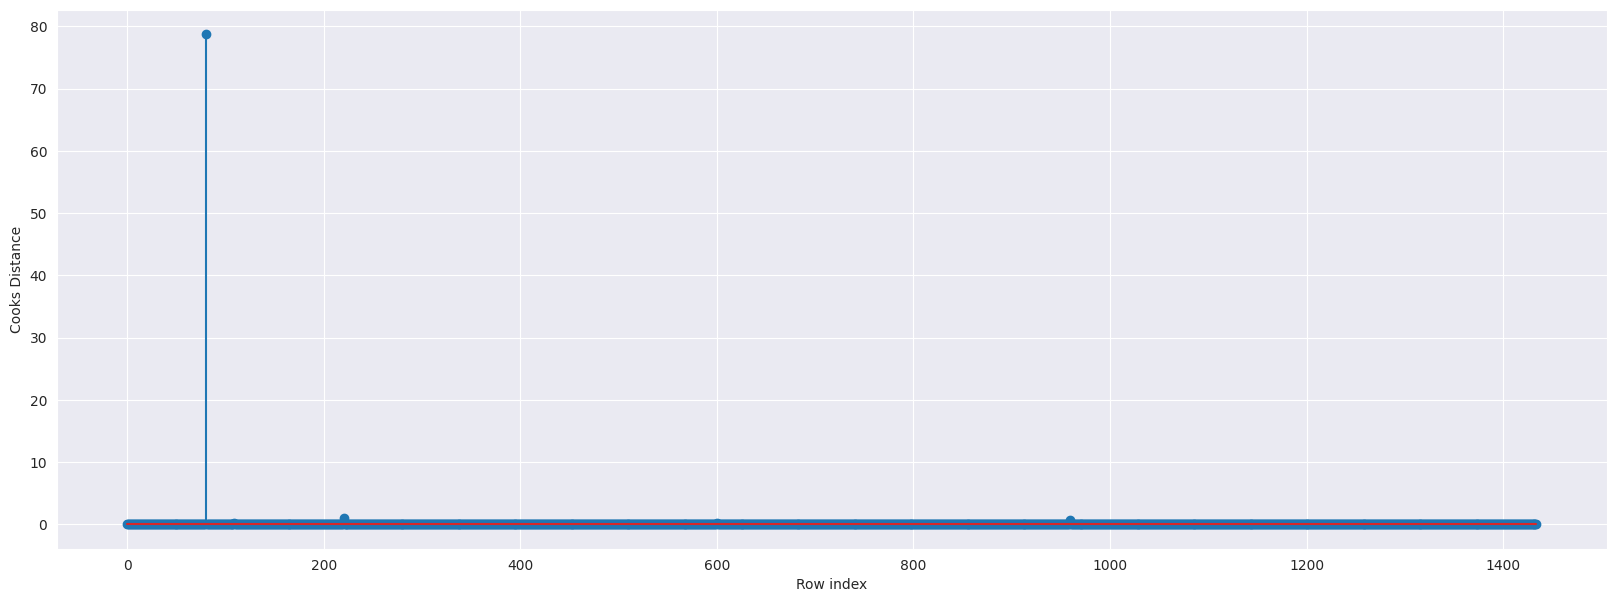

In [75]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(neww)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [86]:

k=neww.shape[1]
n=neww.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [87]:
neww[neww.index.isin([80])] 

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
80,25,20019,110,16000,5,5,100,1180,18950


**Improving the Model**

In [88]:
# Creating a copy of data so that original dataset is not affected
data_new=neww.copy()
data_new

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


In [89]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
new1=data_new.drop(data_new.index[[80]],axis=0).reset_index(drop=True)
new1

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1429,69,20544,86,1300,3,5,69,1025,7500
1430,72,19000,86,1300,3,5,69,1015,10845
1431,71,17016,86,1300,3,5,69,1015,8500
1432,70,16916,86,1300,3,5,69,1015,7250


**Model Deletion Diagnostics and Final Model**

In [94]:
while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    new1=new1.drop(new1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    new1
else:
    final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [96]:
if np.max(c)>0.5:
    model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    new1=new1.drop(new1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    new1 
elif np.max(c)<0.5:
    final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [97]:
final_model.rsquared

0.8882395145171204

In [98]:
new1

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1426,69,20544,86,1300,3,5,69,1025,7500
1427,72,19000,86,1300,3,5,69,1015,10845
1428,71,17016,86,1300,3,5,69,1015,8500
1429,70,16916,86,1300,3,5,69,1015,7250


**Predicting Values**

In [100]:
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"Quarterly_Tax":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,12,40000,80,1300,4,5,69,1012


In [101]:
final_model.predict(new_data)

0    14341.570181
dtype: float64

In [102]:
pred_y=final_model.predict(new1)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64